In [1]:
import yfinance as yf
import finplot as fplt
import pandas as pd
import matplotlib.pyplot as plt
import mplfinance as mpf

%reload_ext autoreload
%autoreload 2

In [81]:
msft = yf.Ticker("MSFT")

# get all stock info
msft.info

# get historical market data
hist = msft.history(period="70y", interval="1d")
# hist.to_csv("MSFT.csv")
hist.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1986-03-13 00:00:00-05:00,0.055004,0.063093,0.055004,0.060396,1031788800,0.0,0.0
1986-03-14 00:00:00-05:00,0.060396,0.063632,0.060396,0.062553,308160000,0.0,0.0
1986-03-17 00:00:00-05:00,0.062553,0.064172,0.062553,0.063632,133171200,0.0,0.0
1986-03-18 00:00:00-05:00,0.063632,0.064172,0.061475,0.062014,67766400,0.0,0.0
1986-03-19 00:00:00-05:00,0.062014,0.062553,0.060396,0.060936,47894400,0.0,0.0


566


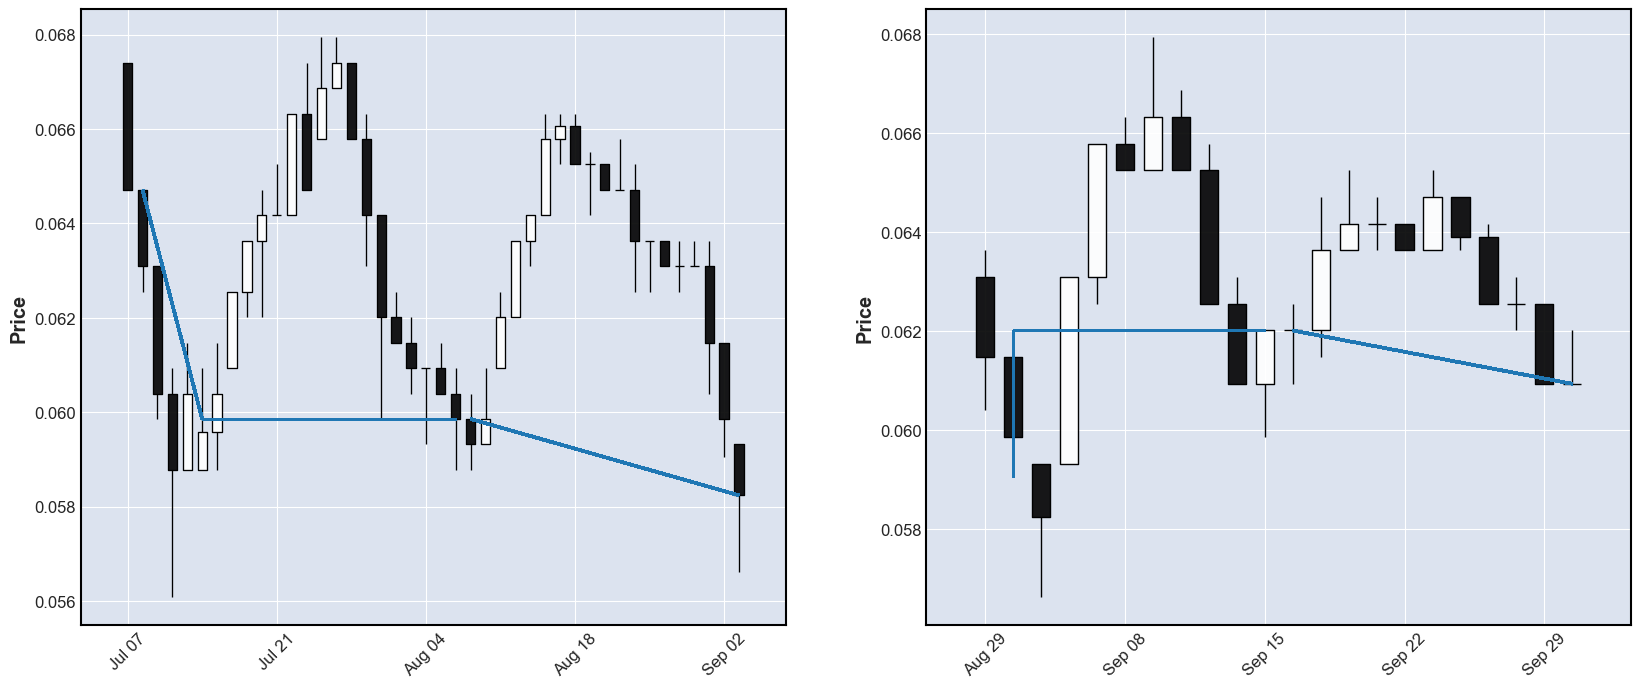

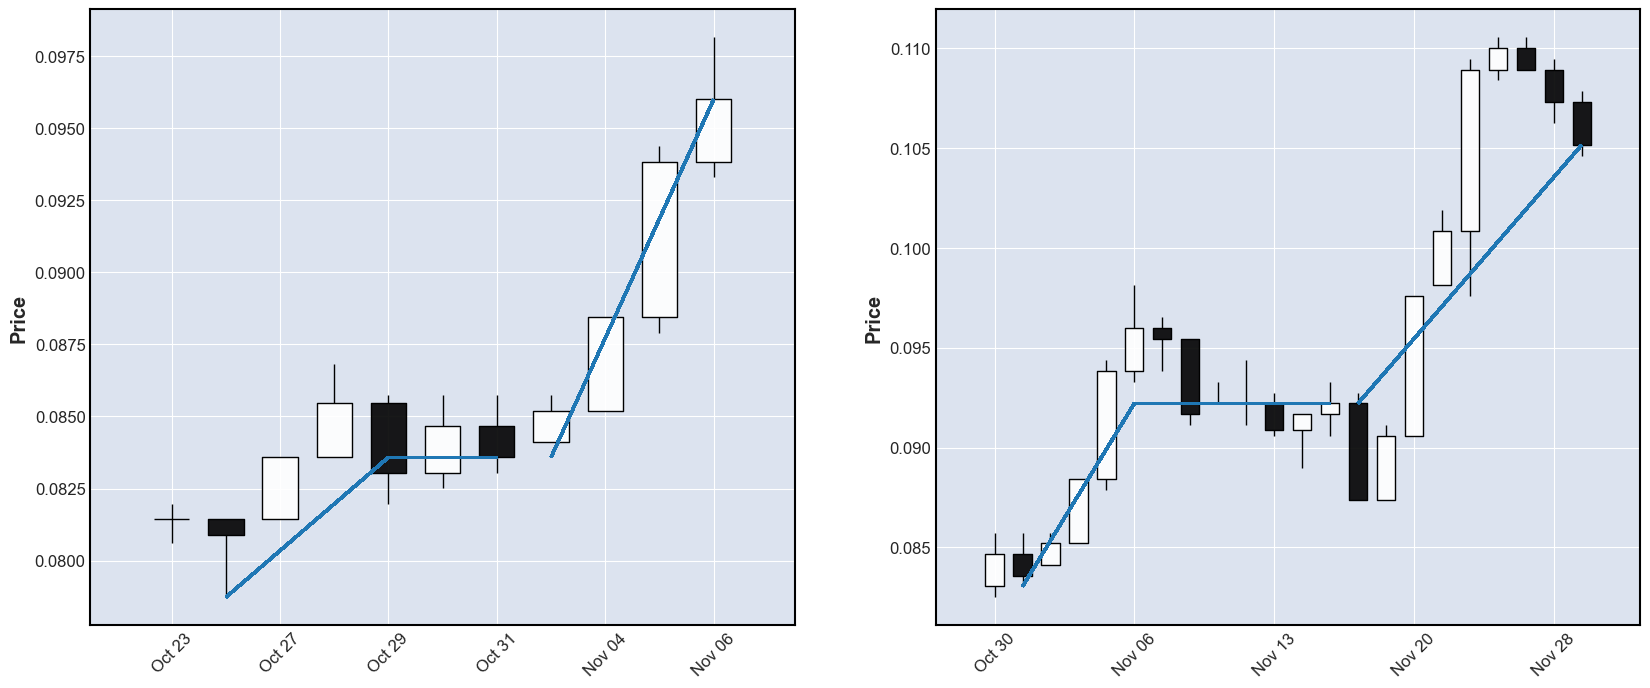

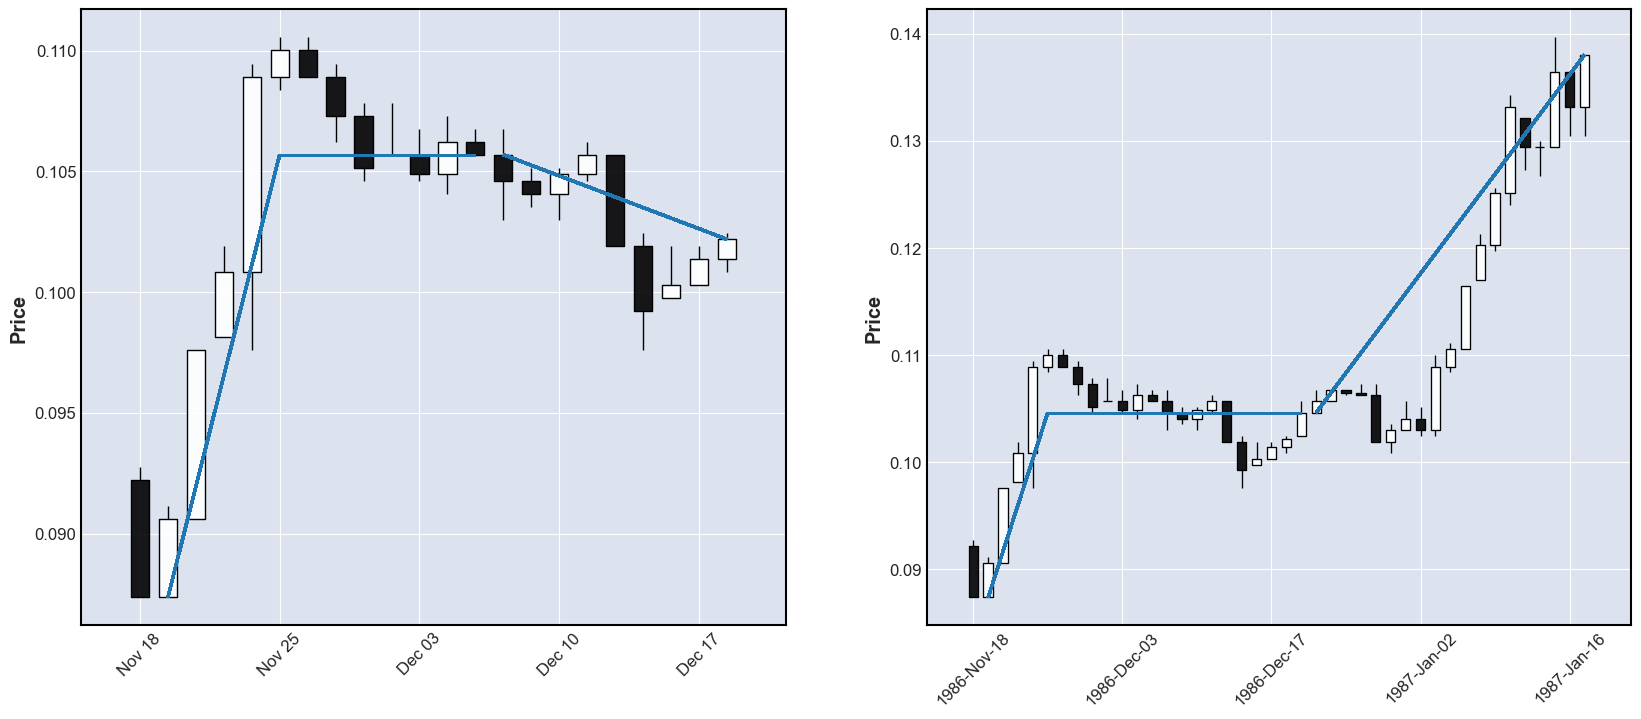

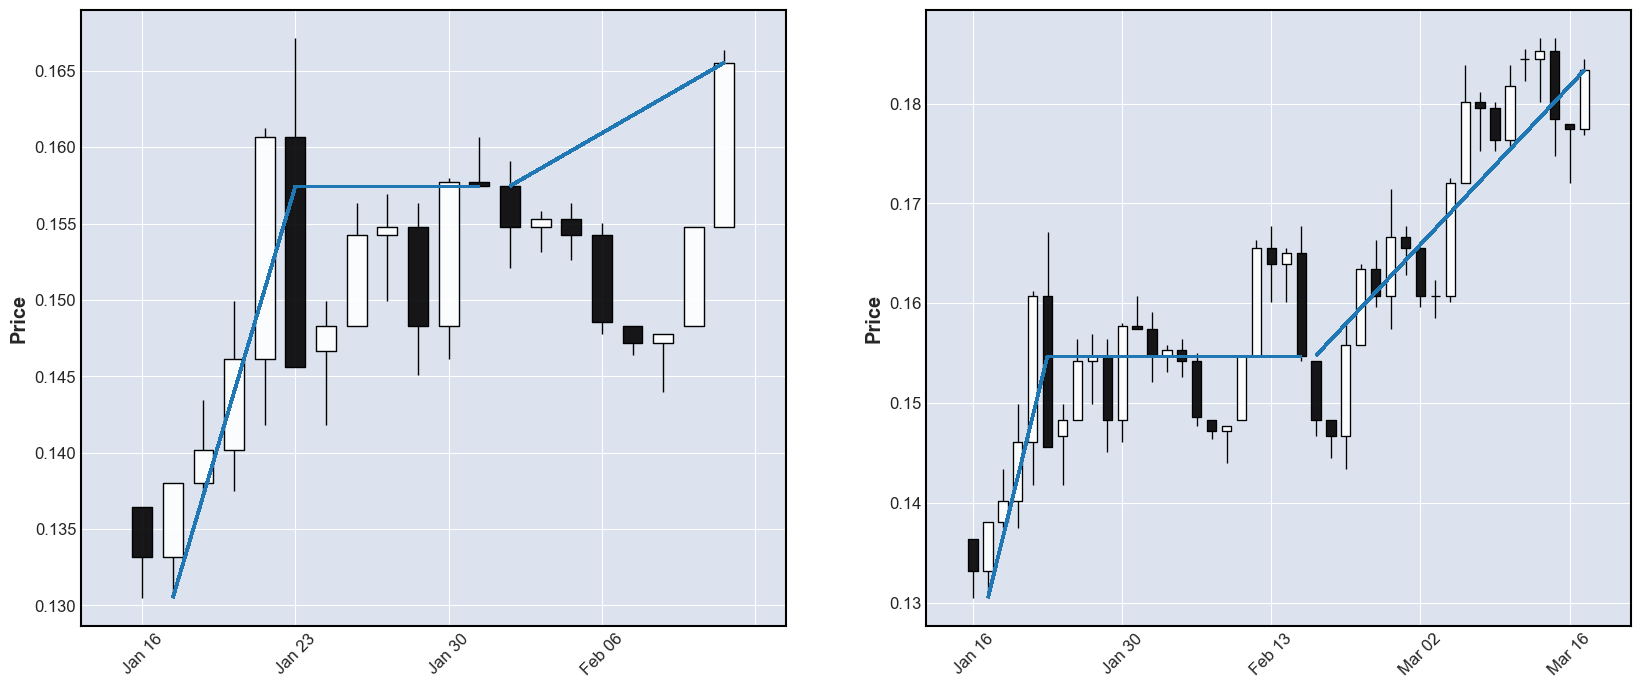

<Mpf_Figure size 2000x800 with 0 Axes>

In [88]:
from utils import DenseLine as CFig


targets, predicts = [], []

n, nplot, wait = 1, 0, 0
fig = mpf.figure(figsize=(20, 8))
for t in range(100, 9000):
    if wait:
        wait -= 1
        continue
    candlefig = CFig(20, 5, 3, 1)
    if candlefig.update(hist, t):
        targets.append(candlefig.target)
        predicts.append(candlefig.prediction)
        wait = candlefig.target_length
        if nplot < 8:
            ax = fig.add_subplot(1,2,n) # main candle stick chart subplot, you can also pass in the self defined style here only for this subplot
            n += 1
            if n > 2:
                n = 1
                fig = mpf.figure(figsize=(20, 8))
            mpf.plot(hist[t-candlefig.body_length-candlefig.trend_length:t+candlefig.target_length+1], type='candle', ax=ax, alines=candlefig.lines)
            nplot += 1
        
print(len(targets))

              precision    recall  f1-score   support

       False       0.43      0.41      0.42       232
        True       0.61      0.63      0.62       334

    accuracy                           0.54       566
   macro avg       0.52      0.52      0.52       566
weighted avg       0.54      0.54      0.54       566

0.007260897636566687


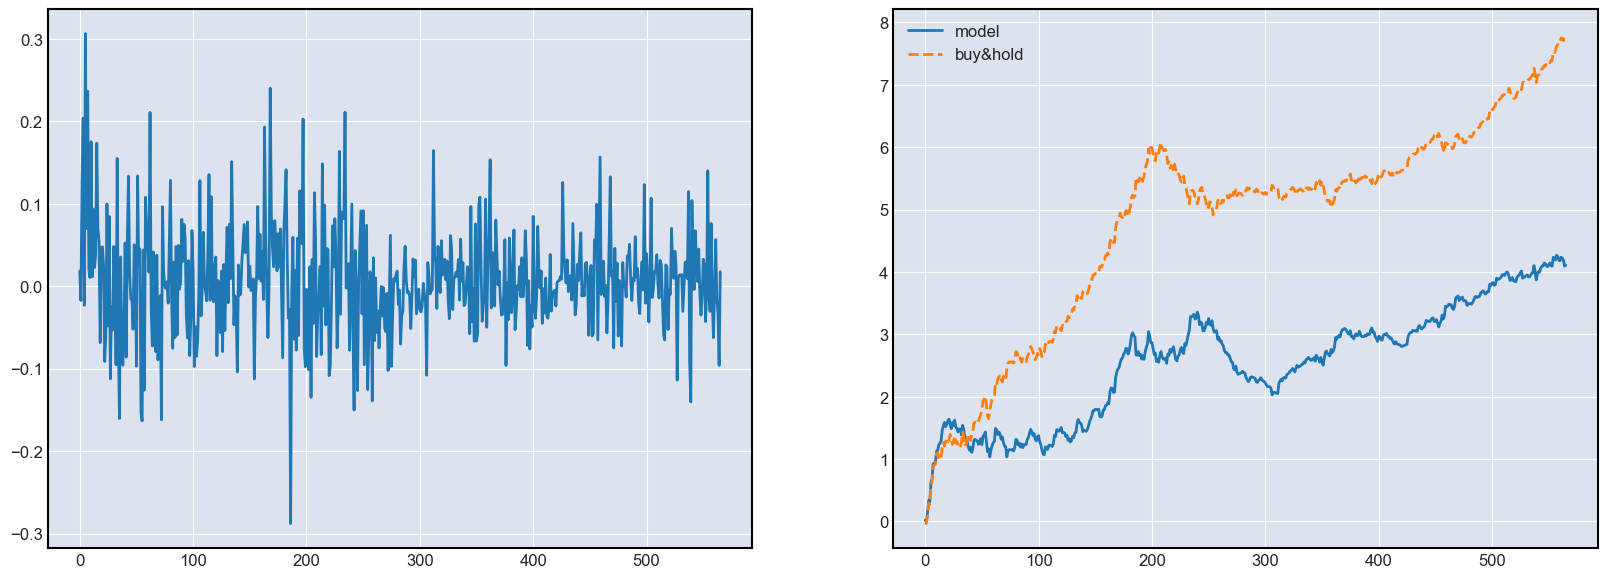

In [89]:
import numpy as np
from sklearn.metrics import classification_report
targets = np.array(targets)
predicts = np.array(predicts)
print(classification_report(targets>0, predicts>0))
res = (targets * predicts)
acc = ((targets>0) == (predicts>0)).sum()/targets.shape[0]
print(res.sum()/len(targets))
plt.figure(figsize=(20, 7))
plt.subplot(1, 2, 1)
plt.plot(res);
plt.subplot(1, 2, 2)
plt.plot(res.cumsum())
plt.plot(targets.cumsum(), "--")
plt.legend(["model", "buy&hold"]);